## 練習時間
### F1-Score 其實是 F-Score 中的 β 值為 1 的特例，代表 Precision 與 Recall 的權重相同

請參考 F1-score 的[公式](https://en.wikipedia.org/wiki/F1_score) 與下圖的 F2-score 公式圖，試著寫出 F2-Score 的計算函數

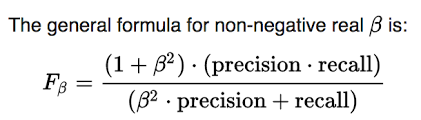

HINT: 可使用 slearn.metrics 中的 precision, recall 函數幫忙

In [24]:
from sklearn import metrics, datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import numpy as np
%matplotlib inline

In [25]:
cancer = datasets.load_breast_cancer() # 我們使用 sklearn 內含的乳癌資料集
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=50, random_state=0)


In [26]:
print(y_test) # 測試集中的 label

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0]


In [27]:
y_pred = np.random.random((50,)) # 我們先隨機生成 50 筆預測值，範圍都在 0~1 之間，代表機率值
y_pred

array([0.62950042, 0.24196606, 0.52191122, 0.11648003, 0.75076974,
       0.59959486, 0.93367449, 0.69720462, 0.55019507, 0.16376797,
       0.20531699, 0.0892545 , 0.98997378, 0.5816336 , 0.17131293,
       0.10406817, 0.30693971, 0.61619606, 0.29531025, 0.66721055,
       0.33051934, 0.1199338 , 0.23227022, 0.82075613, 0.24253049,
       0.67105327, 0.17763055, 0.93522951, 0.92153002, 0.75347441,
       0.86017734, 0.64319645, 0.05758959, 0.14310967, 0.42496664,
       0.66018054, 0.55612356, 0.96820149, 0.12615633, 0.87397883,
       0.36427495, 0.82207771, 0.35997729, 0.99712371, 0.59632131,
       0.2134157 , 0.06981974, 0.83840533, 0.6301073 , 0.48833035])

In [28]:
auc = metrics.roc_auc_score(y_test, y_pred) # 使用 roc_auc_score 來評估。 **這邊特別注意 y_pred 必須要放機率值進去!**
print("AUC: ", auc) # 得到結果約 0.5，與亂猜的結果相近，因為我們的預測值是用隨機生成的

AUC:  0.4940577249575552


In [29]:
threshold = 0.5 
y_pred_binarized = np.where(y_pred>threshold, 1, 0) # 使用 np.where 函數, 將 y_pred > 0.5 的值變為 1，小於 0.5 的為 0
f1 = metrics.f1_score(y_test, y_pred_binarized) # 使用 F1-Score 評估
precision = metrics.precision_score(y_test, y_pred_binarized) # 使用 Precision 評估
recall  = metrics.recall_score(y_test, y_pred_binarized) # 使用 recall 評估
print("F1-Score: ", f1) 
print("Precision: ", precision)
print("Recall: ", recall)

F1-Score:  0.6206896551724138
Precision:  0.6666666666666666
Recall:  0.5806451612903226


In [30]:
y_pred

array([0.62950042, 0.24196606, 0.52191122, 0.11648003, 0.75076974,
       0.59959486, 0.93367449, 0.69720462, 0.55019507, 0.16376797,
       0.20531699, 0.0892545 , 0.98997378, 0.5816336 , 0.17131293,
       0.10406817, 0.30693971, 0.61619606, 0.29531025, 0.66721055,
       0.33051934, 0.1199338 , 0.23227022, 0.82075613, 0.24253049,
       0.67105327, 0.17763055, 0.93522951, 0.92153002, 0.75347441,
       0.86017734, 0.64319645, 0.05758959, 0.14310967, 0.42496664,
       0.66018054, 0.55612356, 0.96820149, 0.12615633, 0.87397883,
       0.36427495, 0.82207771, 0.35997729, 0.99712371, 0.59632131,
       0.2134157 , 0.06981974, 0.83840533, 0.6301073 , 0.48833035])

In [31]:
import numpy as np
y_pred = np.random.randint(2, size=100)  # 生成 100 個隨機的 0 / 1 prediction
y_true = np.random.randint(2, size=100)  # 生成 100 個隨機的 0 / 1 ground truth
y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [32]:
# 隨機建立回歸資料
X, y = datasets.make_regression(n_features=1, random_state=42, noise=4) # 生成資料

model = LinearRegression() # 建立回歸模型
model.fit(X, y) # 將資料放進模型訓練
prediction = model.predict(X) # 進行預測
mae = metrics.mean_absolute_error(prediction, y) # 使用 MAE 評估
mse = metrics.mean_squared_error(prediction, y) # 使用 MSE 評估
r2 = metrics.r2_score(prediction, y) # 使用 r-square 評估

print("X[0:5]: %s \n" % X[0:5])
print("y[0:5]: %s \n" % y[0:5])
print("len(X), len(y) : %s, %s \n" % (len(X), len(y)))

print("MAE: ", mae)
print("MSE: ", mse)
print("R-square: ", r2)



X[0:5]: [[ 0.93128012]
 [ 0.08704707]
 [-1.05771093]
 [ 0.31424733]
 [-0.47917424]] 

y[0:5]: [ 43.6355659   -1.84604382 -40.45736756  12.08091485 -19.09610685] 

len(X), len(y) : 100, 100 

MAE:  2.8417972525655673
MSE:  12.488680067398239
R-square:  0.9916581036260311


In [33]:
# F1 = 2 * (precision * recall) / (precision + recall)
# F2 = 5 * (precision * recall) / (4 * (precision + recall))

precision = metrics.precision_score(y_test, y_pred_binarized) # 使用 Precision 評估
recall  = metrics.recall_score(y_test, y_pred_binarized) # 使用 recall 評估
F2 = 5 * (precision * recall) / (4*precision + recall)
F2

0.5960264900662252

In [34]:
beta = 2
F2_score = (1 + beta**2) * precision * recall / ((beta**2) * precision + recall)
print("Precision: ", precision)
print("Recall: ", recall)
print("F2-Score: ", F2_score)

Precision:  0.6666666666666666
Recall:  0.5806451612903226
F2-Score:  0.5960264900662252
